In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Randomly assigning x and y values by built-in make_classification
X, Y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5, n_classes=2, class_sep=0.7, weights=[0.7],random_state=15)

In [ ]:
print(X.shape, Y.shape)

(50000, 15) (50000,)


In [ ]:
#spiltting train and test dataset by train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=15)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(37500, 15) (12500, 15) (37500,) (12500,)


In [ ]:
#initializing weight and intercept to zero
def initialize_weights(dim):
  w = np.zeros_like(dim)
  b = 0
  return w,b

In [ ]:
dim = X[0]
w, b = initialize_weights(dim)
print("w ",w)
print("b ", str(b))

w  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b  0


In [ ]:
#calculate sigmoid value
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [ ]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [ ]:
def gradient_dw(x,y,w,b,alpha,N):
  #calculate z value Wt,x + b
  z = np.sum(np.dot(w, x))+b
  #ccalculate gradiant for w using formula
  dw = x*(y - sigmoid(z)) - ((alpha / N) * w)
  return dw

In [ ]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.sum(grad_dw)==2.613689585)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
X_train = x_train
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

In [ ]:
#calculate gradiant for b using formula
def gradient_db(x,y,w,b):
  z=np.sum(np.dot(w, x)) + b
  db = y - sigmoid(z)
  return db

In [ ]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

In [ ]:
def logloss(y_true, y_pred):
  #convert ytrue and ypred values to numpy array
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  #calculate loss value
  loss = (-1) * ((1/len(y_true)) * (np.sum(y_true*np.log10(y_pred) + ((1-y_true)*np.log10(1-y_pred)))))
  return loss

In [ ]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(loss==0.07644900402910389)
  return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

In [ ]:
def pred(w, b, x):
  #pred = [1 if sigmoid((np.dot(w, x[i])) + b) >= 0.5 else 0 for i in range(len(x))]
  pred = sigmoid((np.dot(x, w)) + b)
  return pred

In [ ]:
def train(x_train, y_train, x_test, y_test, epochs, alpha, eta0):
  #creating empty list train loss, test loss
  global train_loss
  global test_loss
  #initialize w, b
  w, b = initialize_weights(dim)
  for i in range(epochs):
    for j in range(len(x_train)):
      #getting gradiant of w and b
      dw = gradient_dw(x_train[j], y_train[j],w,b,alpha,N)
      db = gradient_db(x_train[j], y_train[j], w, b)

      w += (alpha * (dw))
      b += (alpha * (db))

    #predict y values for train data
    y_train_pred = pred(w, b, x_train)
    #print(y_train_pred)

    #calculate train loss
    train_l = logloss(y_train, y_train_pred)
    #print(train_l)

    #adding train loss to its list
    train_loss.append(train_l)

    #predict y values for test data
    y_test_pred = pred(w, b, x_test)

    #calculate test loss
    test_l = logloss(y_test, y_test_pred)

    #adding test loss to its list
    test_loss.append(test_l)

    if i != 0:
      if round(train_loss[i], 5) == round(train_loss[i-1], 5):
        print('minimum reached', i)
        return w, b


In [ ]:
train_loss = []
test_loss = []
alpha=0.0001
eta0=0.0001
N=len(x_train)
epochs=50
w,b=train(x_train,y_train,x_test,y_test,epochs,alpha,eta0)

minimum reached 12


In [ ]:
print("Coefficient and intercept calculated by our own function")
print(w, b)

Coefficient and intercept calculated by our own function
[-0.42696913  0.19215659 -0.14739301  0.33812031 -0.21734813  0.56797156
 -0.44523767 -0.09066632  0.22018456  0.17211202  0.1972539   0.00063806
 -0.07984243  0.33896599  0.02262496] -0.8743921634421901


In [ ]:
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf.fit(x_train,y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

In [ ]:
print(w, b)
print('-'*50)
print(clf.coef_, clf.intercept_)
print('-'*50)
w-clf.coef_, b-clf.intercept_

[-0.42696913  0.19215659 -0.14739301  0.33812031 -0.21734813  0.56797156
 -0.44523767 -0.09066632  0.22018456  0.17211202  0.1972539   0.00063806
 -0.07984243  0.33896599  0.02262496] -0.8743921634421901
--------------------------------------------------
[[-0.42336692  0.18547565 -0.14859036  0.34144407 -0.2081867   0.56016579
  -0.45242483 -0.09408813  0.2092732   0.18084126  0.19705191  0.00421916
  -0.0796037   0.33852802  0.02266721]] [-0.8531383]
--------------------------------------------------


(array([[-3.60221756e-03,  6.68093309e-03,  1.19735165e-03,
         -3.32375717e-03, -9.16142288e-03,  7.80577681e-03,
          7.18715292e-03,  3.42180511e-03,  1.09113645e-02,
         -8.72923967e-03,  2.01996277e-04, -3.58109893e-03,
         -2.38735003e-04,  4.37975195e-04, -4.22523777e-05]]),
 array([-0.02125387]))

In [ ]:
print("Difference between sklearn model's Coefficient and own function's coefficient")
print(clf.coef_ - w)
print('-'*50)

print("Difference between sklearn model's intercept and own function's intercept")
print(clf.intercept_ - b)

Difference between sklearn model's Coefficient and own function's coefficient
[[ 3.60221756e-03 -6.68093309e-03 -1.19735165e-03  3.32375717e-03
   9.16142288e-03 -7.80577681e-03 -7.18715292e-03 -3.42180511e-03
  -1.09113645e-02  8.72923967e-03 -2.01996277e-04  3.58109893e-03
   2.38735003e-04 -4.37975195e-04  4.22523777e-05]]
--------------------------------------------------
Difference between sklearn model's intercept and own function's intercept
[0.02125387]


Epochs VS Loss

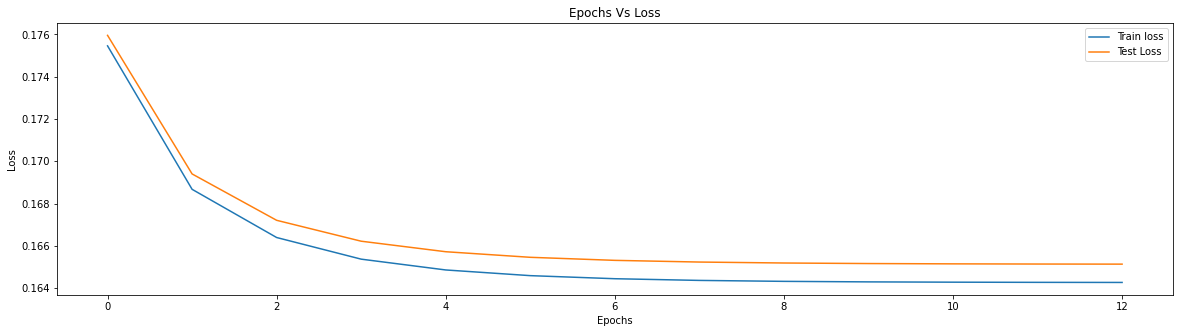

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(train_loss)), train_loss, label='Train loss')
plt.plot(np.arange(len(test_loss)), test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.legend()
plt.show()